# 1. Classification using Linear, Polynomial and Radial basis function kernels. Demonstrate the impact of regularization.

# Import Packages

In [218]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV 

# Load Digits Dataset

In [45]:
data = datasets.load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

# Explore Dataset

### Display the first 10 rows of the dataset

In [46]:
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


### Display the statistical analysis of the dataset

In [47]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


### View the shape of the dataset

In [48]:
df.shape

(1797, 65)

### Visualize one image from the dataset

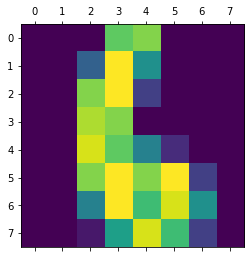

In [68]:
plt.gray
plt.matshow(data.images[6]) 
plt.show()

### Plot 2 attributes

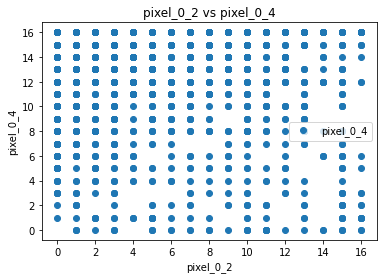

In [49]:
df.plot(x='pixel_0_2', y='pixel_0_4', style='o')  
plt.title('pixel_0_2 vs pixel_0_4')  
plt.xlabel('pixel_0_2')  
plt.ylabel('pixel_0_4')  
plt.show()

# Implementation

### Assign variables to features and target

In [205]:
y = df['target']
x = df.drop(["target"], axis=1)

### Split the dataset into train and test set
* 70% for train and 30% for test

In [206]:
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)

## Classification without Regularization
* specify kernal name

### 1. Linear Kernel Function without Regularization

In [207]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

### 2. Polynomial Kernel Function without Regularization

In [208]:
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_poly.predict(X_test)

### 3. Radial Basis Kernel Function without Regularization

In [209]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

## Classification with Regularization
* L2 by default
* C is a Regularization parameter. Must be +ve.

### 1. Linear Kernel Function with Regularization

In [210]:
clf_l_r = svm.SVC(kernel='linear', C=0.1, max_iter=1000)
clf_l_r.fit(X_train, y_train)
y_pred_l_r = clf_l_r.predict(X_test)

### 2. Ploynomial Kernel Function with Regularization

In [211]:
clf_p_r = svm.SVC(kernel='poly', C=0.1, max_iter=1000)
clf_p_r.fit(X_train, y_train)
y_pred_p_r = clf_p_r.predict(X_test)

### 3. Radial Basis Kernel Function with Regularization

In [212]:
clf_rbf_r = svm.SVC(kernel='rbf', C=0.1, max_iter=1000)
clf_rbf_r.fit(X_train, y_train)
y_pred_rbf_r = clf_rbf_r.predict(X_test)

## Results
* Comparision between classification models with and without regularization

### 1. Linear Kernel
* Better results without regularization

In [213]:
print("\nLinear Kernel Function without Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_linear))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_linear, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_linear, average='macro'))*100, "%")
print("\nLinear Kernel Function with Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_l_r))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_l_r, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_l_r, average='macro'))*100, "%")


Linear Kernel Function without Regularization
Accuracy   : 98.33333333333333 %
Precision  : 98.37896921480456 %
Recall     : 98.38476640656262 %

Linear Kernel Function with Regularization
Accuracy   : 96.66666666666667 %
Precision  : 96.77650353389716 %
Recall     : 96.80254386237253 %


### 2. Polynomial Kernel
* Better results without regularization

In [214]:
print("\nPolynomial Kernel Function without Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_poly))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_poly, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_poly, average='macro'))*100, "%")
print("\nPolynomial Kernel Function with Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_p_r))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_p_r, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_p_r, average='macro'))*100, "%")


Polynomial Kernel Function without Regularization
Accuracy   : 98.33333333333333 %
Precision  : 98.3516187070971 %
Recall     : 98.40843104483173 %

Polynomial Kernel Function with Regularization
Accuracy   : 97.4074074074074 %
Precision  : 97.43480972563378 %
Recall     : 97.48261071670046 %


### 3. Radial Basis Kernel
* Better results without regularization

In [215]:
print("\nRadial Basis Kernel Function without Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_rbf))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_rbf, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_rbf, average='macro'))*100, "%")
print("\nRadial Basis Kernel Function with Regularization")
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_rbf_r))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_rbf_r, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_rbf_r, average='macro'))*100, "%")


Radial Basis Kernel Function without Regularization
Accuracy   : 97.96296296296296 %
Precision  : 97.98292141120498 %
Recall     : 98.05143307322929 %

Radial Basis Kernel Function with Regularization
Accuracy   : 95.37037037037037 %
Precision  : 95.6828708175846 %
Recall     : 95.38032497481751 %


# 2. Demonstrate GridSearchCv method for obtaining optimal hyperparameters for classification using RBF kernel.

### GridSearchCV method
* to obtain optimal hyperparameters for RBF Kernel
* it is a meta-estimator
* takes an estimator like SVC, and creates a new estimator, that behaves exactly the same 
* Fit first runs the same loop with cross-validation, to find the best parameter combination
* then, with the best combination, it runs fit again on all data passed to fit (without cross-validation)
* builds a single new model using the best parameter setting

In [226]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid_fit = grid.fit(X_train, y_train)
y_pred_rbf_grid = grid_fit.predict(X_test) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   25.8s finished


### Best parameters found by GridSearchCV

In [223]:
print(grid_fit.best_params_) 
print(grid_fit.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


### Comparision of classification reports

In [233]:
print("\n-----------------------------------RBF Without GridSearchCV-----------------------------------\n")
print(classification_report(y_test, y_pred_rbf)) 


-----------------------------------RBF Without GridSearchCV-----------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        51
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        48
           5       0.96      0.98      0.97        49
           6       0.98      1.00      0.99        58
           7       1.00      0.98      0.99        64
           8       0.96      0.92      0.94        60
           9       0.94      0.94      0.94        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [234]:
print("\n-----------------------------------RBF With GridSearchCV-----------------------------------\n")
print(classification_report(y_test, grid_predictions)) 


-----------------------------------RBF With GridSearchCV-----------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        56
           2       0.98      1.00      0.99        51
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        48
           5       0.96      0.98      0.97        49
           6       0.98      1.00      0.99        58
           7       1.00      0.98      0.99        64
           8       1.00      0.97      0.98        60
           9       0.96      0.96      0.96        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### The accuracy has increased due to the usage of GridSearchCV 

# ---------------------------------------------------------------------------------------------------------------